# Political Subreddit Sentiment Analysis
## A project for DH101 Summer 2022 by Ray He

This project seeks to use sentiment analysis across data obtained from some political subreddits to try and determine whether different political communities respond to the same current events in the same way. Sentiment analysis describes a Natural Language Processing technique where digital tools are used to analyze text data and determine whether that data is positive or negative.

Note: There may be some installation steps needed to obtain the proper libraries used in the import statements of this notebook to your own machine. All of these installations can easily be run using pip install [insert service name here] in a separate code cell to obtain the dependencies used by this notebook.

In [ ]:
# Change 'praw' value to dependency you may need
# i.e. 'pip install nltk' if nltk is not istalled. 
pip install praw

## Setup Lines

In [32]:
import pandas as pd
import numpy as np
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import seaborn as sns
from IPython import display
from pprint import pprint
import praw
from matplotlib import pyplot

The 'vader_lexicon' being downloaded below will help us perform our sentiment analysis. VADER stands for Valence Aware Dictionary and sEntiment Reasoner and is a peer reviewed tool that is specifically tuned towards sentiments expressed in social media.

In [33]:
nltk.download('vader_lexicon')
nltk.download('stopwords')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/rayleehe/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/rayleehe/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

You will need to create your own reddit instance. Follow the steps here: https://github.com/reddit-archive/reddit/wiki/OAuth2-Quick-Start-Example#first-steps to obtain your own client id, secret and user agent.

In [34]:
reddit = praw.Reddit(client_id="your client id",
                     client_secret="your client secret",
                     user_agent="your user agent")

In this project, we will examine sentiment analysis across the following subreddits: r/politics, r/politicalcompassmemes, r/SandersForPresident, and r/Conservative. 

r/politics was chosen to act as a form of "control". Ideally, r/politics would be a subreddit that encompasses members from all across the political spectrum, and we would expect this subreddit to be more neutral.
r/politicalcompassmemes was chosen as this is a satirical subreddit that is also meant to serve as a discussion board for members across the political spectrum.
r/SandersForPresident and r/Conservative were chosen as examples of a left-leaning and right-leaning subreddit respectively. r/SandersForPresident was chosen over r/Liberal as it has about five times the members with 513k subscribers at time of writing and is the closest subreddit of comparable size to r/conservative's 977k members.

## Getting Data

First, we will examine the headlines of the top 100 hottest posts in each of the subreddits. The "hot" category of a subreddit refers to recent posts that are popular within the community and will give the best "real time" sense of collective sentiment within a subreddit. The "hot" category will also allow us to control for current events as each subreddit will have posts related to the same current events; thus, we can get a more accurate picture of how each subreddit communicates in relation with each other.


In [35]:
politics_headlines = list()
for sub in reddit.subreddit('politics').hot(limit=100):
    politics_headlines.append(sub.title)

In [36]:
pcm_headlines = list()
for sub in reddit.subreddit('politicalcompassmemes').hot(limit=100):
    pcm_headlines.append(sub.title)

In [37]:
s4p_headlines = list()
for sub in reddit.subreddit('sandersforpresident').hot(limit=100):
    s4p_headlines.append(sub.title)

In [38]:
conservative_headlines = list()
for sub in reddit.subreddit('conservative').hot(limit=100):
    conservative_headlines.append(sub.title)
    

## Sentiment Analysis of Headlines

In [8]:
sentiment_analyzer = SentimentIntensityAnalyzer()

politics_results = []
pcm_results = []
s4p_results = []
conservative_results = []

# Using the sentiment analyzer w/ the VADER lexicon,
# obtain sentiment scores for each headline
for headline in politics_headlines:
    scores = sentiment_analyzer.polarity_scores(headline)
    scores['headline'] = headline
    politics_results.append(scores)
politics_df = pd.DataFrame.from_records(politics_results)

for headline in pcm_headlines:
    scores = sentiment_analyzer.polarity_scores(headline)
    scores['headline'] = headline
    pcm_results.append(scores)
pcm_df = pd.DataFrame.from_records(pcm_results)

for headline in s4p_headlines:
    scores = sentiment_analyzer.polarity_scores(headline)
    scores['headline'] = headline
    s4p_results.append(scores)
s4p_df = pd.DataFrame.from_records(s4p_results)

for headline in conservative_headlines:
    scores = sentiment_analyzer.polarity_scores(headline)
    scores['headline'] = headline
    conservative_results.append(scores)
conservative_df = pd.DataFrame.from_records(conservative_results)

In [9]:
# Label all the positive headlines (score > 0.1) and negative headlines (score < -0.1)
# Then sort each df by score, by default, the sort will rearrange the df from
# most negative headlines at the top to most positive headlines at the bottom.
politics_df['label'] = 0
politics_df.loc[politics_df['compound'] > 0.1, 'label'] = 1
politics_df.loc[politics_df['compound'] < -0.1, 'label'] = 1
politics_df = politics_df.sort_values(by="compound")

pcm_df['label'] = 0
pcm_df.loc[pcm_df['compound'] > 0.1, 'label'] = 1
pcm_df.loc[pcm_df['compound'] < -0.1, 'label'] = 1
pcm_df = pcm_df.sort_values(by="compound")

s4p_df['label'] = 0
s4p_df.loc[s4p_df['compound'] > 0.1, 'label'] = 1
s4p_df.loc[s4p_df['compound'] < -0.1, 'label'] = 1
s4p_df = s4p_df.sort_values(by="compound")

conservative_df['label'] = 0
conservative_df.loc[conservative_df['compound'] > 0.1, 'label'] = 1
conservative_df.loc[conservative_df['compound'] < -0.1, 'label'] = 1
conservative_df = conservative_df.sort_values(by="compound")


In [10]:
print("The most negative headlines by subreddit:\n")
print("r/Politics: \n")
pprint(list(politics_df['headline'])[:5], width=100)
print("\n")
print("r/PoliticalCompassMemes: \n")
pprint(list(pcm_df['headline'])[:5], width=100)
print("\n")
print("r/SandersForPresident: \n")
pprint(list(s4p_df['headline'])[:5], width=100)
print("\n")
print("r/Conservative: \n")
pprint(list(conservative_df['headline'])[:5], width=100)

The most negative headlines by subreddit:

r/Politics: 

['Stephanie Grisham shared texts that appear to show how Melania Trump refused to condemn violence '
 'during the Capitol riot',
 'Jan. 6 Suddenly Looks a Hell of a Lot Worse: And it already looked like a violent insurrection.',
 "Alito's Bad History Meets the Vendetta of Clarence Thomas | If democracy dies, it will take a "
 'long and mighty struggle to get it back. In the interim, the personal damage to millions of '
 'Americans will be irreparable.',
 "Trump said 'I don't effing care that they have weapons. They're not here to hurt me' as an angry "
 'mob avoided metal detectors at his January 6 speech: ex-aide testimony',
 "ACLU of Ohio, Planned Parenthood file lawsuit seeking to block Ohio's six-week abortion ban"]


r/PoliticalCompassMemes: 

['If you want assisted abortion argue your case. Assisted suicide is illegal in nearly all cases. '
 'Why should assisted abortion be legal?',
 'Hot Take: Opinion of USA bad. So other 

In [11]:
print("The most positive headlines by subreddit:\n")
print("r/Politics: \n")
pprint(list(politics_df['headline'])[::-1][:5], width=100)
print("\n")
print("r/PoliticalCompassMemes: \n")
pprint(list(pcm_df['headline'])[::-1][:5], width=100)
print("\n")
print("r/SandersForPresident: \n")
pprint(list(s4p_df['headline'])[::-1][:5], width=100)
print("\n")
print("r/Conservative: \n")
pprint(list(conservative_df['headline'])[::-1][:5], width=100)

The most positive headlines by subreddit:

r/Politics: 

["Gorsuch fumes that the Supreme Court 'failed' to 'honor this Nation's promises' as it rolled "
 'back tribal authority in Oklahoma',
 'Republican Who Hailed Abortion Decision As Win For ‘White Life’ Wins House Primary',
 "If The Framers' Text Is The Ultimate Authority, The Supreme Court Must Strip Itself Of Power | "
 'Supreme Court justices make the decisions that they want to make because they want to make them.',
 'Supreme Court Justice Stephen Breyer will retire Thursday, to be replaced by Ketanji Brown '
 'Jackson',
 'Supreme Court Justice Breyer to retire Thursday at noon']


r/PoliticalCompassMemes: 

['Not a meme, a cry for help!!!',
 'I LOVE 5TH GENERATION FIGHTER JETS',
 "PCM of shoes I wear. Yes, I own Toms. Yes, I'm a heterosexual.",
 'Ah yes, liberalism is when you support gay marriage',
 'You and I agreeing on some stuff doesn’t necessarily mean I find you attractive']


r/SandersForPresident: 

["Joe Biden isn't 

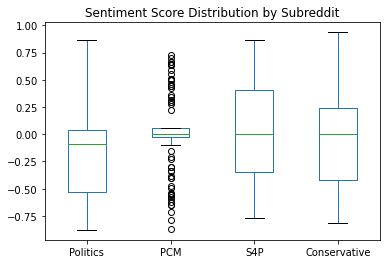

In [12]:
data = pd.DataFrame({"Politics": politics_df["compound"],
                     "PCM": pcm_df["compound"],
                     "S4P": s4p_df["compound"],
                     "Conservative": conservative_df["compound"]})
ax = data[['Politics', 'PCM', 'S4P', 'Conservative']].plot(kind='box',
                                                          title='Sentiment Score Distribution by Subreddit')

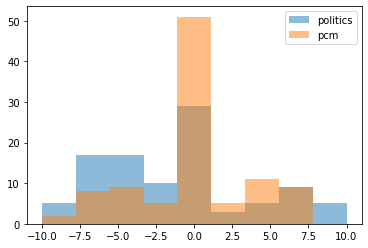

In [13]:
# Ideally, the bins would be a range of -1 to 1 with size gradient of 0.1
# However, numpy doesn't currently allow floats so we rescale our scores.
bins = np.linspace(-10, 10, 10)
politics = politics_df['compound'] * 10
pcm = pcm_df['compound'] * 10
pyplot.hist(politics, bins, alpha=0.5, label='politics')
pyplot.hist(pcm, bins, alpha=0.5, label='pcm')
pyplot.legend(loc='upper right')
pyplot.show()

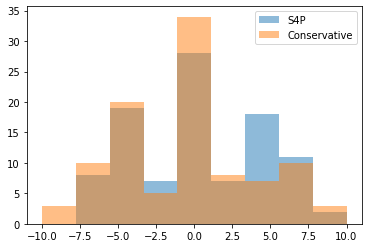

In [14]:
bins = np.linspace(-10, 10, 10)
s4p = s4p_df['compound'] * 10
conservative = conservative_df['compound'] * 10
pyplot.hist(s4p, bins, alpha=0.5, label='S4P')
pyplot.hist(conservative, bins, alpha=0.5, label='Conservative')
pyplot.legend(loc='upper right')
pyplot.show()

In [15]:
politics_filtered = politics_df[politics_df['label'] == 1]
pcm_filtered = pcm_df[pcm_df['label'] == 1]
s4p_filtered = s4p_df[s4p_df['label'] == 1]
conservative_filtered = conservative_df[conservative_df['label'] == 1]

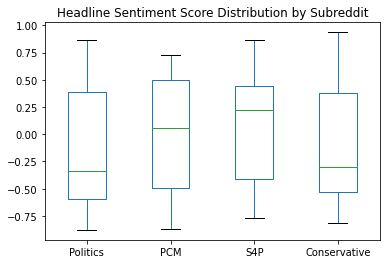

In [31]:
data = pd.DataFrame({"Politics": politics_filtered["compound"],
                     "PCM": pcm_filtered["compound"],
                     "S4P": s4p_filtered["compound"],
                     "Conservative": conservative_filtered["compound"]})
ax = data[['Politics', 'PCM', 'S4P', 'Conservative']].plot(kind='box',
                                                          title='Headline Sentiment Score Distribution by Subreddit')

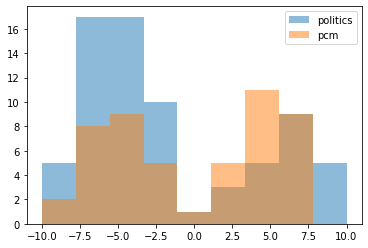

In [17]:
bins = np.linspace(-10, 10, 10)
politics = politics_filtered['compound'] * 10
pcm = pcm_filtered['compound'] * 10
pyplot.hist(politics, bins, alpha=0.5, label='politics')
pyplot.hist(pcm, bins, alpha=0.5, label='pcm')
pyplot.legend(loc='upper right')
pyplot.show()

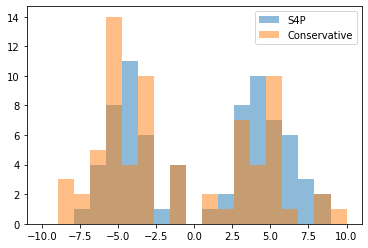

In [28]:
bins = np.linspace(-10, 10, 20)
s4p = s4p_filtered['compound'] * 10
conservative = conservative_filtered['compound'] * 10
pyplot.hist(s4p, bins, alpha=0.5, label='S4P')
pyplot.hist(conservative, bins, alpha=0.5, label='Conservative')
pyplot.legend(loc='upper right')
pyplot.show()

To display the following images in the notebook, add a "!" character in front of each line.
[S4P vs. Coservative 6/28](s4pvconservative.png)
[Politics vs. PCM 6/28](politicsvpcm.png)

## Sentiment Analysis of Comments
Note: The following cell takes a LONG time to run

In [19]:
# Obtain top-level comments of the top 50 "hottest" posts.
# We are only obtaining 50 here as 100 posts takes far too long to index.
# (close to 15 minutes).
# Top-level commets tell us how people react to the post
# but there is data lost in response comments reacting to the
# reaction. I chose to not include these response comments as it 
# drastically slows down notebook performance but the analysis likely could be done
# on a faster machine.
politics_comments = []
pcm_comments = []
s4p_comments = []
conservative_comments = []

politics_posts = reddit.subreddit("politics").hot(limit=50)
for post in politics_posts:
    url = "https://www.reddit.com" + post.permalink
    post_content = reddit.submission(url=url)
    post_content.comments.replace_more(limit=0)
    post_content.comment_limit=100
    for comment in post_content.comments:
        politics_comments.append(comment.body)

pcm_posts = reddit.subreddit("politicalcompassmemes").hot(limit=50)
for post in pcm_posts:
    url = "https://www.reddit.com" + post.permalink
    post_content = reddit.submission(url=url)
    post_content.comments.replace_more(limit=0)
    post_content.comment_limit=100
    for comment in post_content.comments:
        pcm_comments.append(comment.body)
        
s4p_posts = reddit.subreddit("sandersforpresident").hot(limit=50)
for post in s4p_posts:
    url = "https://www.reddit.com" + post.permalink
    post_content = reddit.submission(url=url)
    post_content.comments.replace_more(limit=0)
    post_content.comment_limit=100
    for comment in post_content.comments:
        s4p_comments.append(comment.body)
        
conservative_posts = reddit.subreddit("conservative").hot(limit=50)
for post in conservative_posts:
    url = "https://www.reddit.com" + post.permalink
    post_content = reddit.submission(url=url)
    post_content.comments.replace_more(limit=0)
    post_content.comment_limit=100
    for comment in post_content.comments:
        conservative_comments.append(comment.body)

In [20]:
sentiment_analyzer = SentimentIntensityAnalyzer()

politics_results = []
pcm_results = []
s4p_results = []
conservative_results = []

# Using the sentiment analyzer w/ the VADER lexicon,
# obtain sentiment scores for each comment
for comment in politics_comments:
    scores = sentiment_analyzer.polarity_scores(comment)
    scores['comment'] = comment
    politics_results.append(scores)
politics_comm_df = pd.DataFrame.from_records(politics_results)

for comment in pcm_comments:
    scores = sentiment_analyzer.polarity_scores(comment)
    scores['comment'] = comment
    pcm_results.append(scores)
pcm_comm_df = pd.DataFrame.from_records(pcm_results)

for comment in s4p_comments:
    scores = sentiment_analyzer.polarity_scores(comment)
    scores['comment'] = comment
    s4p_results.append(scores)
s4p_comm_df = pd.DataFrame.from_records(s4p_results)

for comment in conservative_comments:
    scores = sentiment_analyzer.polarity_scores(comment)
    scores['comment'] = comment
    conservative_results.append(scores)
conservative_comm_df = pd.DataFrame.from_records(conservative_results)

# Just as we did for headlines, we will add labels to scores and sort the dataframe by score.
politics_comm_df['label'] = 0
politics_comm_df.loc[politics_comm_df['compound'] > 0.1, 'label'] = 1
politics_comm_df.loc[politics_comm_df['compound'] < -0.1, 'label'] = 1
politics_comm_df = politics_comm_df.sort_values(by="compound")

pcm_comm_df['label'] = 0
pcm_comm_df.loc[pcm_comm_df['compound'] > 0.1, 'label'] = 1
pcm_comm_df.loc[pcm_comm_df['compound'] < -0.1, 'label'] = 1
pcm_comm_df = pcm_comm_df.sort_values(by="compound")

s4p_comm_df['label'] = 0
s4p_comm_df.loc[s4p_comm_df['compound'] > 0.1, 'label'] = 1
s4p_comm_df.loc[s4p_comm_df['compound'] < -0.1, 'label'] = 1
s4p_comm_df = s4p_comm_df.sort_values(by="compound")

conservative_comm_df['label'] = 0
conservative_comm_df.loc[conservative_comm_df['compound'] > 0.1, 'label'] = 1
conservative_comm_df.loc[conservative_comm_df['compound'] < -0.1, 'label'] = 1
conservative_comm_df = conservative_comm_df.sort_values(by="compound")

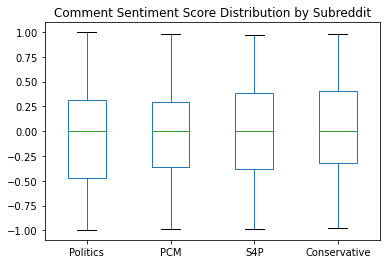

In [30]:
data = pd.DataFrame({"Politics": politics_comm_df["compound"],
                     "PCM": pcm_comm_df["compound"],
                     "S4P": s4p_comm_df["compound"],
                     "Conservative": conservative_comm_df["compound"]})
ax = data[['Politics', 'PCM', 'S4P', 'Conservative']].plot(kind='box',
                                                          title='Comment Sentiment Score Distribution by Subreddit')

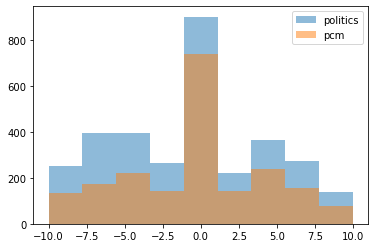

In [22]:
bins = np.linspace(-10, 10, 10)
politics = politics_comm_df['compound'] * 10
pcm = pcm_comm_df['compound'] * 10
pyplot.hist(politics, bins, alpha=0.5, label='politics')
pyplot.hist(pcm, bins, alpha=0.5, label='pcm')
pyplot.legend(loc='upper right')
pyplot.show()

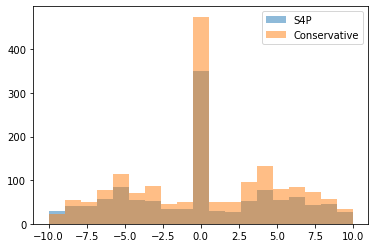

In [23]:
bins = np.linspace(-10, 10, 20)
s4p = s4p_comm_df['compound'] * 10
conservative = conservative_comm_df['compound'] * 10
pyplot.hist(s4p, bins, alpha=0.5, label='S4P')
pyplot.hist(conservative, bins, alpha=0.5, label='Conservative')
pyplot.legend(loc='upper right')
pyplot.show()

In [24]:
politics_comm_filtered = politics_comm_df[politics_comm_df['label'] == 1]
pcm_comm_filtered = pcm_comm_df[pcm_comm_df['label'] == 1]
s4p_comm_filtered = s4p_comm_df[s4p_comm_df['label'] == 1]
conservative_comm_filtered = conservative_comm_df[conservative_comm_df['label'] == 1]

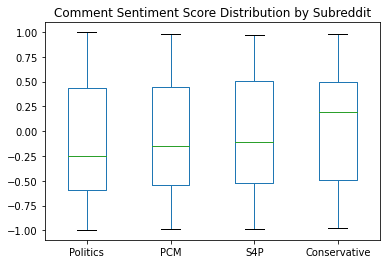

In [29]:
data = pd.DataFrame({"Politics": politics_comm_filtered["compound"],
                     "PCM": pcm_comm_filtered["compound"],
                     "S4P": s4p_comm_filtered["compound"],
                     "Conservative": conservative_comm_filtered["compound"]})
ax = data[['Politics', 'PCM', 'S4P', 'Conservative']].plot(kind='box',
                                                          title='Comment Sentiment Score Distribution by Subreddit')

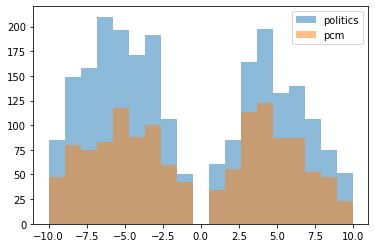

In [26]:
bins = np.linspace(-10, 10, 20)
politics = politics_comm_filtered['compound'] * 10
pcm = pcm_comm_filtered['compound'] * 10
pyplot.hist(politics, bins, alpha=0.5, label='politics')
pyplot.hist(pcm, bins, alpha=0.5, label='pcm')
pyplot.legend(loc='upper right')
pyplot.show()

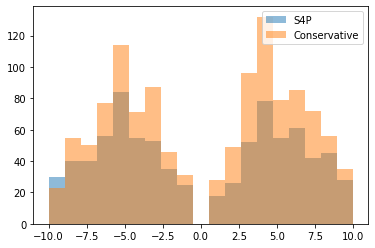

In [27]:
bins = np.linspace(-10, 10, 20)
s4p = s4p_comm_filtered['compound'] * 10
conservative = conservative_comm_filtered['compound'] * 10
pyplot.hist(s4p, bins, alpha=0.5, label='S4P')
pyplot.hist(conservative, bins, alpha=0.5, label='Conservative')
pyplot.legend(loc='upper right')
pyplot.show()

# Conclusion

Comparing r/Politics to r/PoliticalCompassMemes was not a very fruitful task as PoliticalCompassMemes seems to confuse the VADER analysis in some cases, this is likely due to the large number of inside jokes and contemporary meme references that VADER is perhaps not trained on.

While r/Politics was meant to be the "control" subreddit to look at, it ended up being more negative than both of the political party subreddits. Perhaps this is due to the fact that there are more clashing ideals on this subreddit.

r/SandersForPresident and r/Conservative proved to be an interesting comparison after removing neutral headlines. r/SandersForPresident tended to have much more positive headlines than r/Conservative, while r/Conservative had much more positive comments than r/SandersForPresident. Without removing neutral headlines, however, all subreddits seemed to have an overall neutral sentiment over large numbers of posts.

When we think about it, the opposite trends in the subreddits isn't entirely surprising as these are opposing ideologies reacting to the same news. If some world news came out that made conservatives happy, liberal subreddits may be more negative and vice versa. The interesting part is that this trend doesn't affect headlines and comments in the same way. 